In [1]:
# initial setup
%run "../../../common/0_notebooks_base_setup.py"

/Users/csuarezgurruchaga/Desktop/Digital-House/clase_20/dsad_2021/common
default checking
Running command `conda list`... ok
jupyterlab=2.2.6 already installed
pandas=1.1.5 already installed
bokeh=2.2.3 already installed
seaborn=0.11.0 already installed
matplotlib=3.3.2 already installed
ipywidgets=7.5.1 already installed
pytest=6.2.1 already installed
chardet=4.0.0 already installed
psutil=5.7.2 already installed
scipy=1.5.2 already installed
statsmodels=0.12.1 already installed
scikit-learn=0.23.2 already installed
xlrd=2.0.1 already installed
Running command `conda install --yes nltk=3.5.0`... ok
Solving environment: ...working... done

# All requested packages already installed.


unidecode=1.1.1 already installed
pydotplus=2.0.2 already installed
pandas-datareader=0.9.0 already installed
flask=1.1.2 already installed


---

<img src='../../../common/logo_DH.png' align='left' width=35%/>


# Aprendizaje supervisado

<a id="section_toc"></a> 
## Tabla de Contenidos

<a href="#section_intro">Introducción</a>

<a href="#section_regresion">Regresión</a>
- <a href="#section_regresion_data">Dataset</a>
- <a href="#section_regresion_modelo">Modelo de Regresión Lineal</a>

<a href="#section_clasificacion">Clasificación</a>
- <a href="#section_clasificacion_dataset">Dataset</a>
- <a href="#section_clasificacion_modelo">Modelo de Clasificación</a>

<a href="#section_resumen">En resumen</a>

---

<a id="section_intro"></a>
##  Introducción

[volver a TOC](#section_toc)

La mayoría de las clases de algoritmos de machine learning son aquellas que toman decisiones a partir de ejemplos conocidos. Es decir, les proveemos tanto la entrada de los datos, como el resultado o target asociado a los mismos. El algoritmo se *ajusta* de acuerdo a esos datos, y permite luego predecir un nuevo resultado a partir de una entrada de datos desconocida.

En otras palabras, los algoritmos de *aprendizaje supervisado* se encargan de *asociar características o features* de las observaciones (las entradas de los datos), a una determinada variable *target* u *objetivo* (el resultado) . 

La *supervisión* del aprendizaje se produce en el momento en que comparamos las predicciones del modelo con los valores reales que se buscan predecir. Dependiendo del tipo de problema, existen distintas *métricas de performance* que podemos computar para saber cuán acertadas fueron las predicciones.

Si la variable objetivo es una **variable continua**, se trata de un problema de **regresión**. Por ejemplo, el precio del metro cuadrado de una propiedad.

Si, por el contrario, la variable objetivo es una **variable categórica**, nos encontramos ante un caso de **clasificación**. Por ejemplo, la marca de spam o no spam de un correo electrónico.

A continuación, veremos ejemplos simples de aplicación de métodos de aprendizaje supervisado. Todavía no entraremos en demasiado detalle teórico sobre los modelos, pero este primer contacto nos permitirá ilustrar la metodología de trabajo y asentar las bases del uso de Scikit-Learn.

<a id="section_regresion"></a>
### Regresión

[volver a TOC](#section_toc)

Como ejemplo de este proceso, vamos a considerar una regresión lineal simple, es decir, el caso común de ajustar una recta a datos de la forma $(x, y)$,    donde $x$ es la única _feature_ que caracteriza a una observación e $y$, el valor de la variable objetivo asociada.

El modelo asume que hay una relación *aproximadamente lineal* entre $x$ e $y$, que podemos expresar matemáticamente como

$$ y_i \approx \beta_0 + \beta_1 x_{i1}. $$

De acuerdo a esta ecuación, decimos que calculamos $y$ a partir de $x$. $\beta_0$ y $\beta_1$ son los coeficientes o parámetros desconocidos que representan la ordenada al origen y la pendiente del modelo lineal, respectivamente.  

La tarea consiste en estimar los valores de $\beta_0$ y $\beta_1$ que permitan hacer una predicción de $y$ a partir de un valor conocido de $x$. Una vez que ajustamos el modelo a nuestros datos, obtenemos los estimadores $\hat{\beta_0}$ y $\hat{\beta_1}$, con los que podemos predecir $y$ a partir de cualquier valor de $x$, simplemente computando

$$ \hat{y_i} = \hat{\beta_0} + \hat{\beta_1} x_{i1}. $$

Para ejemplificar la regresión lineal simple, vamos a utilizar el dataset de publicidad presentado en el manual [An Introduction to Statistical Learning with Applications in R](https://static1.squarespace.com/static/5ff2adbe3fe4fe33db902812/t/601cc86d7f828c4792e0bcae/1612499080032/ISLR+Seventh+Printing.pdf) de James, Witten, Hastie y Tibshirani (2013).

Primero importamos las librerías necesarias para trabajar con datos y visualizar:

In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<a id="section_regresion_data"></a>

### Dataset

[volver a TOC](#section_toc)


Cargamos el dataset de publicidad para nuestro ejemplo de regresión:

In [3]:
advertising = pd.read_csv('../Data/Advertising.csv')
advertising.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


Vamos a observar las primeras 5 filas de nuestro dataset. 

In [4]:
advertising.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


Las primeras tres columnas representan los gastos de publicidad en miles de USD en diferentes medios (TV, radio y diarios). Estas tres columnas constituyen nuestras _features_.

La cuarta columna representa las ventas de un determinado producto en miles de unidades de la empresa que invierte en publicidad. Esta va a ser nuestra variable _target_.

**Nuestro objetivo será predecir la cantidad de ventas a partir de la inversión en publicidad en los diferentes medios**.

Visualizamos los datos haciendo un *pair plot*:

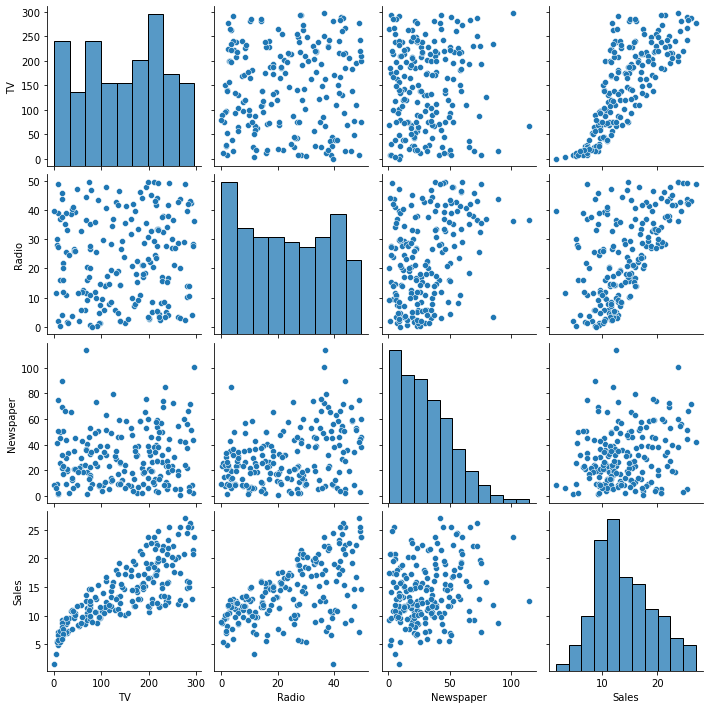

In [5]:
sns.pairplot(advertising);

Visualizamos la matriz de correlación:

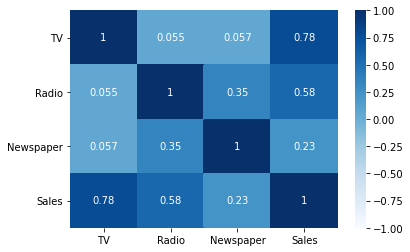

In [6]:
sns.heatmap(advertising.corr(), annot=True, vmin=-1, cmap='Blues');

Como nuestro primer objetivo es hacer un modelo de regresión simple, es decir con una sola feature, vamos a elegir la variable TV, ya que es la que muestra una correlación mayor con nuestra variable objetivo.

Vamos a hacer un _scatter plot_ entre TV y Sales. El método `regplot()` de Seaborn genera un gráfico que, además de los datos, también nos va a mostrar la recta que se obtiene con una regresión lineal simple:

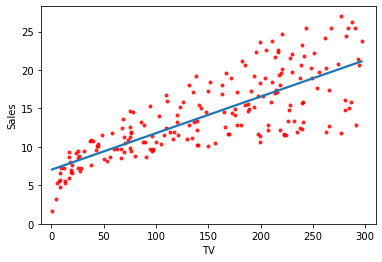

In [7]:
sns.regplot(data = advertising, x="TV", y="Sales", order=1, ci=None, scatter_kws={'color':'r', 's':9})
plt.xlim(-10,310)
plt.ylim(bottom=0);

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Cómo se interpreta esta recta?</b></label></div>
</div>

Esta recta representa el valor de ventas generadas cada tanto dinero invertido en publicidad con la TV, y se genera con un modelo de regresion lineal simple.

<a id="section_regresion_modelo"></a>

### Modelo de Regresión Lineal

[volver a TOC](#section_toc)


Para poder conocer qué valores adoptan $\hat{\beta_0}$ y $\hat{\beta_1}$, necesitamos *ajustar* un modelo de regresión lineal simple a los datos. Para ello, utilizaremos Scikit-Learn y seguiremos la serie de pasos que vimos anteriormente:

<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png"/> </div>
  <div style="float:left;width: 85%;"><label><b>1. Seleccionar una clase de modelo<br>
                                             2. Elegir los hiperparámetros del modelo<br>
                                             3. Preparar los datos en una matriz de <i>features</i> y un vector <i>target</i><br>
                                             4. Separar los sets de entrenamiento y de testeo<br>
                                             5. Ajustar el modelo a los datos de entrenamiento<br>
                                             6. Predecir etiquetas para datos desconocidos<br>
      7. Evaluar la <i>performance</i> del modelo</b></label></div>
</div>

##### **1. Seleccionar una clase de modelo**

En Scikit-Learn, cada **clase de modelo** se representa con un **módulo de Python**. La biblioteca está cuidadosamente estructurada en módulos, de forma tal que cada clase o función se encuentre en un módulo específico que engloba clases o funciones de la misma familia. 

Entonces, para trabajar con un modelo de regresión lineal, podemos *importar la clase de regresión lineal* representada por el módulo correspondiente:

In [8]:
from sklearn.linear_model import LinearRegression

`LinearRegression` constituye una clase de **estimador** particular. Notar que también existen otros modelos de regresión lineal más generales. Podés leer más acerca de ellos en la [documentación del módulo `linear_model`](http://Scikit-Learn.org/stable/modules/linear_model.html). 

##### **2. Elegir los hiperparámetros del modelo**

Una vez que hemos decidido nuestra clase de modelo, todavía tenemos que tomar algunas decisiones, que se representan frecuentemente como *hiperparámetros*, o parámetros que deben ser seteados antes de que el modelo sea ajustado a los datos.

Para nuestro ejemplo de regresión lineal, podemos instanciar la clase `LinearRegression` y especificar que nos gustaría ajustar el intercepto seteando a `True` el hiperparámetro `fit_intercept`: 

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

##### **3. Preparar los datos en una matriz de _features_ y un vector _target_**

A continuación, creamos la matriz de _features_ (a la que llamaremos $X$ por convención) y el vector _target_ ($y$), que utilizaremos para ajustar nuestro modelo de regresión lineal simple.

In [10]:
# Creamos X e y
feature_cols = ['TV']
X = advertising[feature_cols]
y = advertising.Sales

# Chequeamos shape y el tipo de cada uno
print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (200, 1)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (200,)
Type y: <class 'pandas.core.series.Series'>


##### **4. Separar los sets de entrenamiento y de testeo**

Como vimos antes, vamos a dividir los datos en un _training set_ y un _testing set_. El modelo aprenderá a partir de los datos del _training set_ y, luego del entrenamiento, predecirá valores de $y$ a partir de observaciones de la $X$ del conjunto de _testing set_, que luego serán contrastadas con los valores reales de las $y$ de testeo.

Esto podría hacerse a mano, pero es más conveniente usar la función `train_test_split()`, que importaremos del módulo de [`model_selection`](https://scikit-learn.org/stable/model_selection.html) de Scikit-Learn, el cual contiene herramientas para la selección y evaluación de modelos:

In [11]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

`train_test_split()` debe recibir como argumento un objeto bidimensional $X$, un objeto unidimensional $y$, a partir de los cuales devuelve dos matrices de _features_ y dos vectores *target*, correspondientes a los conjuntos de entrenamiento y testeo, respectivamente. Notar que el orden es relevante, por lo que tendremos que prestar atención a la asignación de los retornos de la función. Con una sintaxis similar a la de _unpacking_ de listas o tuplas, podemos hacer una correcta asignación en una única línea de código:

```python
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y)
```

Por defecto, la separación de las observaciones se hace al azar (`shuffle=True`), de forma tal de trabajar con un muestreo aleatorio. Para poder controlar esta aleatoriedad, podemos establecer con el argumento `random_state` una semilla (equivalente al `seed` de Numpy). Optativamente, también podemos regular el tamaño de cada set de datos con los argumentos `train_size` o `test_size`.

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué inconvenientes podrían surgir de no aleatorizar los datos que son asignados a los conjuntos de entrenamiento y testeo?</b></label></div>
</div>

Si por ejemplo los datos del dataset estuvieran ordenados y tomaramos el primer 80% del dataset para entrenamiento y el ultimo 20% para testeo, tendriamos un modelo que su performance seria muy baja, ya que nunca vio datos como los del set de testeo.

##### **5. Ajustar el modelo a los datos de entrenamiento**

Ahora nuestro modelo debe aprender a partir de los datos de entrenamiento, usando el método ``fit()`` de nuestra instancia de modelo.

In [12]:
model.fit(Xtrain, ytrain)

LinearRegression()

Verifiquemos los valores de $\hat{\beta_0}$ y $\hat{\beta_1}$ que aprendió el modelo inspeccionando los atributos `intercept_` y `coef_`, respectivamente:

In [13]:
model.coef_

array([0.04802945])

In [14]:
model.intercept_

6.91197261886872

##### **6. Predecir etiquetas para datos desconocidos**

Una vez que el modelo ya está entrenado, la principal tarea en el aprendizaje supervisado es evaluarlo en base a lo que dice acerca de nuevos datos que no fueron parte del _training set_. 

En Scikit-Learn, usamos el método ``predict()``.

In [15]:
# Usando el método del objeto
test_sklearn = np.array(Xtest).reshape(-1,1)
model.predict(test_sklearn)

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

Podemos calcular y asignar a una variable las predicción del modelo para todas las observaciones en el set de testeo usando el método ``predict()`` de la siguiente forma:

In [16]:
ypred = model.predict(Xtest)
ypred

array([17.03658069, 16.63793625, 11.50839099, 20.36982452, 19.10184704,
       20.53312465, 14.75518181, 15.59569719, 10.30285179, 17.25751616,
       14.81281715, 10.23561056, 17.22389554, 12.18560623, 17.75702244,
       12.94927449, 13.23745119, 20.87413375,  8.14152654, 17.03177774,
       11.7341294 , 10.16836933,  8.11751182, 12.07033555, 12.33449753,
       15.96072101,  8.98204192, 18.86169979, 14.92328489, 18.44384358,
       18.43423769, 18.17487866, 14.10198129, 15.08658502, 18.84248801,
       15.79261793, 17.59372231, 13.12698346, 17.32475739,  7.85334984,
        7.54115841, 11.2538349 ,  7.81012333, 16.71478337,  7.2625876 ,
       13.98671061, 10.66787561, 17.86268723, 16.75800988, 17.9347314 ])

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué significan estos valores?</b></label></div>
</div>

Son los valores de la cantidad de ventas que predijo el modelo a partir de los valores de inversion, luego habra que compararlos con los valores ytest

##### **7. Evaluar la _performance_ del modelo**

Finalmente, vamos a  evaluar el desempeño del modelo comparando las predicciones con los valores reales. 

Repetimos algunas de las métricas más utilizadas:

El **error absoluto medio** (_Mean Absolut Error_ o MAE) es la media del valor absoluto de los errores:

$$ \frac 1n\sum_ {i = 1}^n |y_i-\hat{y}_i| $$

El **error cuadrático medio** (_Mean Squared Error_ o MSE) es la media de los errores al cuadrado:

$$ \frac 1n\sum_ {i = 1}^n(y_i- \hat{y}_i)^2 $$

El **error cuadrático medio raíz** (_Root Mean Squared Error_ o RMSE) es la raíz cuadrada de la media de los errores al cuadrado:

$$ \sqrt{\frac 1n\sum_{i = 1}^n(y_i- \hat{y}_i)^2} $$

El **$R^2$** es la proporción de la varianza total de $y$ explicada por el modelo.

Comparando estas métricas:

- _MAE_ es el error promedio.
- _MSE_ "penaliza" errores grandes, de ahí que eleve los valores al cuadrado.
- _RMSE_ es comparable con la variable objetivo, ya que tiene las mismas unidades que la $y$.
- _$R^2$_ es la proporción de la varianza total de $y$ explicada por el modelo

Con excepción del $R^2$, todas éstas son **funciones de pérdida**, porque queremos **minimizarlas**. El $R^2$, por su parte, cuanto más próximo a 1 se encuentre, mejor.

En el [módulo de métricas](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) de Scikit-Learn podemos hallar funciones específicas para evaluar la _performance_ de un modelo:

In [17]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print ('MAE:', mean_absolute_error(ytest, ypred).round(2))
print ('MSE:', mean_squared_error(ytest, ypred).round(2))
print ('RMSE:', np.sqrt(mean_squared_error(ytest, ypred)).round(2))
print ('R2:', r2_score(ytest, ypred).round(2))

MAE: 2.46
MSE: 10.31
RMSE: 3.21
R2: 0.56


En la clases que vienen vamos a estudiar en profundidad el modelo de regresión lineal, tanto en su versión simple como múltiple. Más adelante en el curso también trabajaremos con otras técnicas de regresión no lineales, como los árboles de regresión y los ensambles de regresión, que constituyen algunos de los algoritmos del _state of the art_ de _machine learning_.

---

Pasemos ahora a analizar un ejemplo sencillo de clasificación.

<a id="section_clasificacion"></a>

### Clasificación

[volver a TOC](#section_toc)


Dentro de lo que llamamos aprendizaje supervisado, los problemas de clasificación se diferencian de los de regresión porque **la variable objetivo es categórica**. El interés no es ya estimar un valor continuo, sino que queremos predecir una determinada **clase** o **etiqueta (*label*)** para cada observación.

Trabajaremos con un dataset que también surge del manual _An Introduction to Statistical Learning with Applications in R_, el cual contiene información acerca de titulares de tarjetas de crédito, tales como el saldo mensual, el ingreso anual y si se trata de estudiantes o no, además de una variable que indica si entraron en _default_ o no. **El objetivo será, justamente, predecir quiénes entran en _default_ y quienes no a partir de las demás *features***.

<a id="section_clasificacion_dataset"></a>

### Dataset

[volver a TOC](#section_toc)


Trabajaremos con un dataset que también surge del manual _An Introduction to Statistical Learning with Applications in R_, el cual contiene información acerca de titulares de tarjetas de crédito, tales como el saldo mensual, el ingreso anual y si se trata de estudiantes o no, además de una variable que indica si entraron en _default_ o no.

**El objetivo será, justamente, predecir quiénes entran en _default_ y quienes no a partir de las demás *features***.

Importamos el dataset y visualizamos las primeras 5 filas:

In [18]:
df = pd.read_csv('../Data/Default.csv', sep="\t")
df.head()

,default,student,balance,income
0,No,No,729.526495,44361.625074
1,No,Yes,817.180407,12106.134700
2,No,No,1073.549164,31767.138947
3,No,No,529.250605,35704.493935
4,No,No,785.655883,38463.495879


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   default  10000 non-null  object 
 1   student  10000 non-null  object 
 2   balance  10000 non-null  float64
 3   income   10000 non-null  float64
dtypes: float64(2), object(2)
memory usage: 312.6+ KB


Generamos variables _dummies_ para representar los atributos categóricos:

In [20]:
df = pd.get_dummies(df, drop_first=True)
df.head()

,balance,income,default_Yes,student_Yes
0,729.526495,44361.625074,0,0
1,817.180407,12106.134700,0,1
2,1073.549164,31767.138947,0,0
3,529.250605,35704.493935,0,0
4,785.655883,38463.495879,0,0


In [21]:
df.describe()

,balance,income,default_Yes,student_Yes
count,10000.000000,10000.000000,10000.000000,10000.000000
mean,835.374886,33516.981876,0.033300,0.294400
std,483.714985,13336.639563,0.179428,0.455795
min,0.000000,771.967729,0.000000,0.000000
25%,481.731105,21340.462903,0.000000,0.000000
50%,823.636973,34552.644802,0.000000,0.000000
75%,1166.308386,43807.729272,0.000000,1.000000
max,2654.322576,73554.233495,1.000000,1.000000


Generamos un _pair plot_ de las variables distinguiendo los casos de _default_ y no *default*:

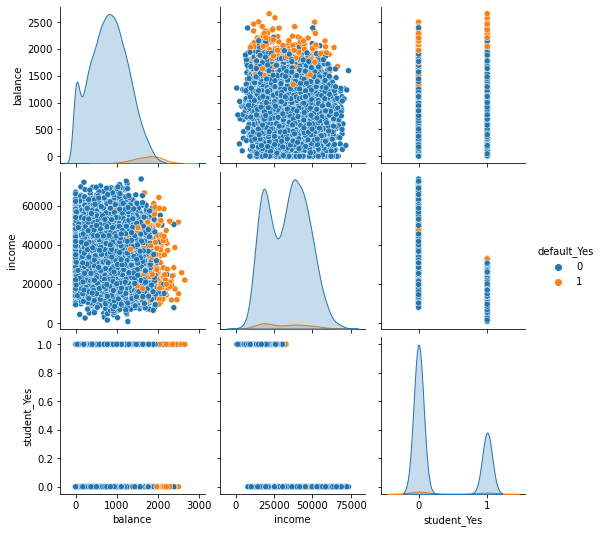

In [22]:
# sns.pairplot(df, hue='default_Yes', diag_kind='hist');
sns.pairplot(df, hue='default_Yes', diag_kind='auto');

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué observamos en estos gráficos? ¿Existen variables que podrían ser buenas predictoras?</b></label></div>
</div>

<a id="section_regresion_modelo"></a>

### Modelo de Clasificación

[volver a TOC](#section_toc)


Aunque se trate ahora de un problema de clasificación, veremos a continuación que vamos a seguir nuevamente el flujo de trabajo que presentamos para el ejercicio de regresión anterior.

##### **1. Seleccionar una clase de modelo**

Para la tarea de predicción de _default_, usaremos un modelo probabilístico extremadamente simple, conocido como Naive Bayes Gaussiano, el cual parte del [Teorema de Bayes](https://es.wikipedia.org/wiki/Teorema_de_Bayes) y procede asumiendo que cada _feature_ se genera a partir de una [distribución Gaussiana](https://es.wikipedia.org/wiki/Distribuci%C3%B3n_normal) condicional a la clase (_default_ o no *default*). Más adelante en el curso estudiaremos con más detalle los fundamentos de este modelo.

In [23]:
from sklearn.naive_bayes import GaussianNB

##### **2. Elegir los hiperparámetros del modelo**

Porque es muy rápido y prácticamente no tiene hiperparámetros para elegir, Naive Bayes Gaussiano es frecuentemente utilizado como _baseline_ de cualquier problema de clasificación, para contar con una piso de _performance_ que buscaremos luego superar utilizando modelos más sofisticados.

In [24]:
model = GaussianNB()

##### **3. Preparar los datos en una matriz de _features_ y un vector _target_**

In [25]:
# Creamos X e y
feature_cols = ['balance', 'income', 'student_Yes']
X = df[feature_cols]
y = df.default_Yes

print("Shape X:", X.shape)
print("Type X:", type(X))
print("Shape y:", y.shape)
print("Type y:", type(y))

Shape X: (10000, 3)
Type X: <class 'pandas.core.frame.DataFrame'>
Shape y: (10000,)
Type y: <class 'pandas.core.series.Series'>


<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/haciendo_foco.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>Nuestra matriz de <i>features</i> se compone ahora de tres variables predictoras. El vector <i>target</i>, por su parte, contiene ahora valores dicotómicos y no continuos que representan cada una de las clases del problema.</b></label></div>
</div>

##### **4. Separar los sets de entrenamiento y de testeo**

In [26]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=1)

##### **5. Ajustar el modelo a los datos de entrenamiento**

In [27]:
model.fit(Xtrain, ytrain)

GaussianNB()

##### **6. Predecir etiquetas para datos desconocidos**

In [28]:
ypred = model.predict(Xtest)
ypred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/para_seguir_pensando.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>¿Qué significan estos valores?</b></label></div>
</div>

##### **7. Evaluar la _performance_ del modelo**

Dado que la clasificación y la regresión se diferencian en el tipo de variable que constituye el *target*, es de esperar que no vayamos a utilizar las mismas métricas de evaluación, ya que éstas dependen, justamente, de los valores de la $y$ real y aquellos predichos.

Cuando estamos clasificando, nuestra variable objetivo es cualitativa, por lo que las etiquetas predichas sólo pueden estar acertadas o equivocadas. Una forma de evaluar a un clasificador podría ser, por ejemplo, calcular cuántas casos clasificamos correctamente en relación al total de casos. Esta métrica se conoce como **accuracy**, y puede ser computada fácilmente con el método `accuracy_score()`, que devuelve la proporción de etiquetas predichas que coinciden con el valor real.

$$ \text{Accuracy}=\frac{\text{predicciones correctas}}{\text{casos totales}} $$

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, ypred)

0.974

Con este sencillo algoritmo de clasificación obtenemos **un accuracy del 97,4%**, es decir que 97 de cada 100 casos fueron correctamente predichos. Más adelante discutiremos si este valor es realmente alto y contra qué deberíamos compararlo para arribar a alguna conclusión al respecto, al tiempo que estudiaremos otras métricas de evaluación que también nos permitirán analizar el desempeño de un clasificador poniendo el foco en diversos aspectos del problema.

<a id="section_resumen"></a>

### En Resumen

[volver a TOC](#section_toc)


Hemos visto ejemplos de problemas de aprendizaje automático supervisado, donde buscamos predecir a partir de ciertas features una variable _target_. Cuando la variable objetivo es continua, como en el caso de la predicción de ventas a partir del presupuesto destinado a publicidad en TV, se trata de un **problema de regresión**. En cambio, cuando la variable a predecir es categórica, como en el ejemplo de predicción de _defaults_ de tarjetas de crédito, nos encontramos ante un **problema de clasificación**.

La biblioteca **Scikit-Learn** es el paquete fundamental para trabajar con algoritmos de _machine learning_ con Python. A partir de esta clase, será nuestra principal herramienta de trabajo. Continuaremos profundizando en ella a lo largo de todo el curso, pero es importante que recordemos el flujo de trabajo que presentamos en esta notebook, ya que nos acompañará de ahora en más:

<br>
<div id="caja9" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/kit_de_salida.png"/> </div>
  <div style="float:left;width: 85%;"><label><b>1. Seleccionar una clase de modelo<br>
                                             2. Elegir los hiperparámetros del modelo<br>
                                             3. Preparar los datos en una matriz de <i>features</i> y un vector <i>target</i><br>
                                             4. Separar los sets de entrenamiento y de testeo<br>
                                             5. Ajustar el modelo a los datos de entrenamiento<br>
                                             6. Predecir etiquetas para datos desconocidos<br>
      7. Evaluar la <i>performance</i> del modelo</b></label></div>
</div>

<div id="caja10" style="float:left;width: 100%;">
  <div style="float:left;width: 15%;"><img src="../../../common/icons/ponete_a_prueba.png" style="align:left"/> </div>
  <br>
  <br>
  <div style="float:left;width: 85%;"><label><b>Ahora que conocés de qué se tratan los problemas de regresión y clasificación, ¿te imaginás algún caso en que podrías aplicar estas técnicas?</b></label></div>
</div>